In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [19]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite",echo=False)

In [22]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [23]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [24]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [25]:
# Create our session (link) from Python to the DB
session = Session(bind = engine)

# Exploratory Precipitation Analysis

### Measurement Columns
##### *, Prcp, Station, Tobs, Date, ID
### Station Columns
##### *, ID, Elevation, Latitude, Station, Longitude, Name

In [46]:
# Find the most recent date in the data set.
dates = []
for row in session.query(Measurement.date):
    dates.append(row)
date = max(dates)
print(f"Most Recent Date: {date}")
print(f"12 Month Date: ('2016-08-24',)")

Most Recent Date: ('2017-08-23',)
12 Month Date: ('2016-08-24',)


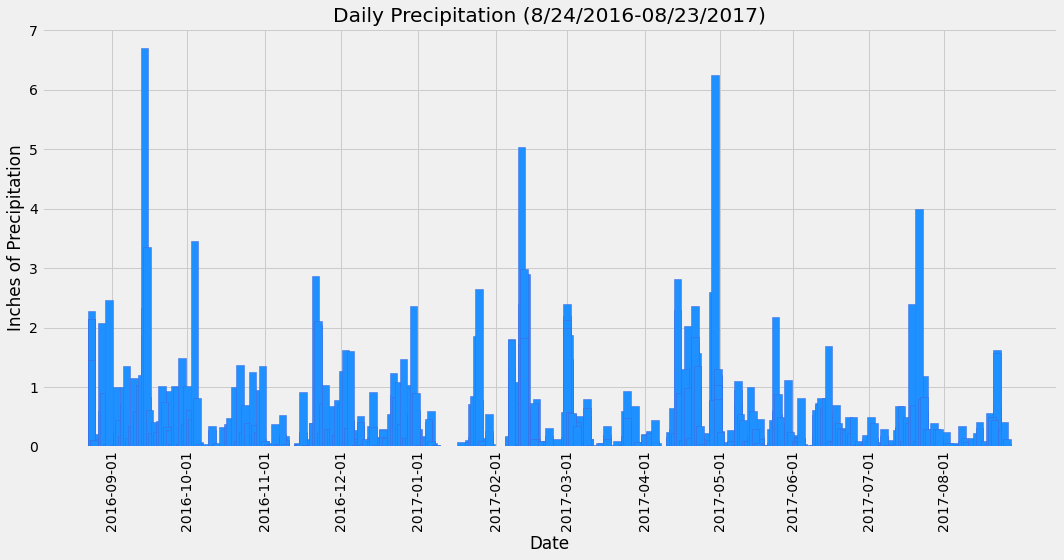

In [114]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.
date = dt.datetime(2016, 8, 23)
dates12 = []
prcps12 = []
# Perform a query to retrieve the data and precipitation scores
for row in session.query(Measurement.date, Measurement.prcp).filter(Measurement.date > date):
    dates12.append(row[0])
    prcps12.append(row[1])
# Save the query results as a Pandas DataFrame and set the index to the date column
months12 = pd.DataFrame()
months12["Date"] = dates12
months12["Precip."] = prcps12
months12.set_index("Date")
# Sort the dataframe by date
months12.sort_values("Date")
# Use Pandas Plotting with Matplotlib to plot the data
x = months12["Date"].tolist()
y = months12["Precip."].tolist()
plt.figure(figsize=(15,8))
plt.bar(x,y,width=3,fc="dodgerblue",ec='royalblue')
plt.ylabel("Inches of Precipitation")
plt.xlabel("Date")
plt.xticks(['2016-09-01','2016-10-01','2016-11-01','2016-12-01','2017-01-01','2017-02-01',
           '2017-03-01','2017-04-01','2017-05-01','2017-06-01','2017-07-01','2017-08-01'], rotation='90')
plt.title("Daily Precipitation (8/24/2016-08/23/2017)")
plt.tight_layout()
plt.savefig("Results/Daily_Precipitation.png")
plt.show()

In [106]:
# Use Pandas to calcualte the summary statistics for the precipitation data
months12.describe()

,Precip.
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [120]:
# Design a query to calculate the total number stations in the dataset
station_count = session.query(Station.id).group_by(Station.id).count()
print(f"There are {station_count} stations.")

There are 9 stations.


In [168]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
stations = list(sorted(session.query(Station.name).distinct()))
counts = []
for station in stations:
    func.count(session.query(Station.name = station))
    counts.append()
stations

SyntaxError: keyword can't be an expression (<ipython-input-168-3e481d77551c>, line 6)

In [127]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.


In [15]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close session

In [16]:
# Close Session
session.close()